In [1]:
import pandas as pd
import numpy as np

### Get the country codes (from some random dataset)

In [2]:
gdp = pd.read_csv('data/gdp.csv')

#### Select for the relevant years

In [3]:
gdp_14_17 = gdp[['Country Name', 'Country Code', '2014', '2015', '2016', '2017']].drop(gdp.loc[(gdp['2014'] == '..') | (gdp['2015'] == '..') | (gdp['2016'] == '..') | (gdp['2017'] == '..')].index)

In [4]:
gdp_14_17['2014'] = pd.to_numeric(gdp_14_17['2014'])

In [5]:
gdp_14_17['2015'] = pd.to_numeric(gdp_14_17['2015'])

In [6]:
gdp_14_17['2016'] = pd.to_numeric(gdp_14_17['2016'])

In [7]:
gdp_14_17['2017'] = pd.to_numeric(gdp_14_17['2017'])

In [8]:
gdp_14_17['GDP_capita'] = gdp_14_17[['2014', '2015', '2016', '2017']].mean(axis=1)

In [9]:
gdp_14_17

,Country Name,Country Code,2014,2015,2016,2017,GDP_capita
0,Afghanistan,AFG,613.856689,578.466353,509.218661,519.884773,555.356619
1,Albania,ALB,4578.631994,3952.801215,4124.055726,4531.020806,4296.627435
2,Algeria,DZA,5494.352336,4187.509727,3945.482081,4111.294110,4434.659564
3,American Samoa,ASM,11507.232349,11843.331183,11696.955562,10823.444804,11467.740975
4,Andorra,AND,41303.929371,35762.523074,37474.665406,38962.880354,38375.999551
...,...,...,...,...,...,...,...
259,Sub-Saharan Africa,SSF,1866.683379,1669.496761,1506.429765,1563.361240,1651.492786
260,Sub-Saharan Africa (excluding high income),SSA,1854.676450,1658.630611,1495.049768,1551.283751,1639.910145
261,Sub-Saharan Africa (IDA & IBRD countries),TSS,1866.683379,1669.496761,1506.429765,1563.361240,1651.492786
262,Upper middle income,UMC,8261.032726,7698.211065,7632.381923,8368.500477,7990.031548


#### Median of GDP per capita

In [10]:
average_gdp = gdp_14_17['GDP_capita'].median()

In [11]:
average_gdp

6520.64991860447

### Split countries by above or below median GDP

In [12]:
gdp_filtered_above = gdp_14_17.loc[(gdp_14_17['GDP_capita'] >= average_gdp)].drop(columns=['2014', '2015', '2016', '2017'])
gdp_filtered_below = gdp_14_17.loc[(gdp_14_17['GDP_capita'] < average_gdp)].drop(columns=['2014', '2015', '2016', '2017'])

In [13]:
gdp_filtered_above

,Country Name,Country Code,GDP_capita
3,American Samoa,ASM,11467.740975
4,Andorra,AND,38375.999551
6,Antigua and Barbuda,ATG,14592.176681
7,Argentina,ARG,13381.785742
9,Aruba,ABW,27979.465570
...,...,...,...
252,Other small states,OSS,13548.650262
254,Post-demographic dividend,PST,41971.328514
256,Small states,SST,12290.807761
262,Upper middle income,UMC,7990.031548


In [14]:
gdp_filtered_below

,Country Name,Country Code,GDP_capita
0,Afghanistan,AFG,555.356619
1,Albania,ALB,4296.627435
2,Algeria,DZA,4434.659564
5,Angola,AGO,4294.319002
8,Armenia,ARM,3774.964716
...,...,...,...
257,South Asia,SAS,1638.178406
258,South Asia (IDA & IBRD),TSA,1638.178406
259,Sub-Saharan Africa,SSF,1651.492786
260,Sub-Saharan Africa (excluding high income),SSA,1639.910145


### Average population over years 2014, 2015, 2016, 2017

In [15]:
country_population = pd.read_csv("data/country_population.csv")

In [16]:
country_population = country_population[['Country Name', '2014', '2015', '2016', '2017']]

In [17]:
country_population['average'] = country_population[['2014', '2015', '2016', '2017']].mean(axis=1)

### Read food consumption data from FAO

In [18]:
fao_consumption = pd.read_csv("data/FAO_Consumption.csv")

### Depression dataset

In [19]:
depression = pd.read_csv("data/depression.csv")

In [20]:
fao_consumption_filtered = fao_consumption.loc[fao_consumption['Year'].isin(['2014', '2015', '2016', '2017'])]

In [23]:
fao_consumption_filtered

,Unnamed: 0,Country Name,Year,GBL Consumption,Dairy Consumption,Fruits Consumption,Meat Consumption,Vegetables Consumption,Confections Consumption,Caffeine Consumption,Alcohol Consumption
0,0,Afghanistan,2014,8371.0,1897.0,1072.0,562.36,1873.0,684.00,110.0,1.0
1,1,Afghanistan,2015,8105.0,2263.0,1203.0,551.20,1871.0,676.00,82.0,0.0
2,2,Afghanistan,2016,8773.0,2273.0,1039.0,531.05,3154.0,628.00,51.0,30.0
3,3,Afghanistan,2017,8656.0,2221.0,1207.0,520.00,2405.0,712.00,79.0,0.0
5,5,Albania,2014,1174.0,1151.0,571.0,203.23,956.0,185.00,6.0,106.0
...,...,...,...,...,...,...,...,...,...,...,...
863,863,Zambia,2017,4769.0,400.0,125.0,607.80,1687.0,4651.00,5.0,633.0
865,865,Zimbabwe,2014,2556.0,473.0,231.0,384.26,539.0,4559.16,14.0,542.0
866,866,Zimbabwe,2015,2366.0,447.0,303.0,374.80,545.0,4081.16,13.0,391.0
867,867,Zimbabwe,2016,2426.0,441.0,308.0,364.47,539.0,4185.15,16.0,406.0


In [24]:
np.unique(list(fao_consumption_filtered['Country Name']))

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Canada', 'Central African Republic',
       'Chad', 'Chile', 'China', 'China, Hong Kong SAR',
       'China, Macao SAR', 'China, Taiwan Province of', 'China, mainland',
       'Colombia', 'Congo', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', "Côte d'Ivoire",
       "Democratic People's Republic of Korea", 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji',
       'Finland', 'France', 'French Polynesia', 'Gabon', 'Gambia',
       'Georgia', 'Germany', 'Ghana', 'Greece', 'Gr

In [25]:
depression_filtered = depression.loc[depression['Year'].isin(['2014', '2015', '2016', '2017'])]

### Merge FAO consumption and Depression datasets on Country and Year

In [26]:
depression_filtered

,Unnamed: 0,Country Name,Year,Depression Count
24,24,Afghanistan,2014,884404.683172
25,25,Afghanistan,2015,906133.433945
26,26,Afghanistan,2016,932188.730746
27,27,Afghanistan,2017,967281.203243
52,52,Albania,2014,68970.473430
...,...,...,...,...
6439,6439,Zambia,2017,438079.199268
6464,6464,Zimbabwe,2014,311665.769283
6465,6465,Zimbabwe,2015,320638.507158
6466,6466,Zimbabwe,2016,330437.353798


In [27]:
fao_consumption_filtered

,Unnamed: 0,Country Name,Year,GBL Consumption,Dairy Consumption,Fruits Consumption,Meat Consumption,Vegetables Consumption,Confections Consumption,Caffeine Consumption,Alcohol Consumption
0,0,Afghanistan,2014,8371.0,1897.0,1072.0,562.36,1873.0,684.00,110.0,1.0
1,1,Afghanistan,2015,8105.0,2263.0,1203.0,551.20,1871.0,676.00,82.0,0.0
2,2,Afghanistan,2016,8773.0,2273.0,1039.0,531.05,3154.0,628.00,51.0,30.0
3,3,Afghanistan,2017,8656.0,2221.0,1207.0,520.00,2405.0,712.00,79.0,0.0
5,5,Albania,2014,1174.0,1151.0,571.0,203.23,956.0,185.00,6.0,106.0
...,...,...,...,...,...,...,...,...,...,...,...
863,863,Zambia,2017,4769.0,400.0,125.0,607.80,1687.0,4651.00,5.0,633.0
865,865,Zimbabwe,2014,2556.0,473.0,231.0,384.26,539.0,4559.16,14.0,542.0
866,866,Zimbabwe,2015,2366.0,447.0,303.0,374.80,545.0,4081.16,13.0,391.0
867,867,Zimbabwe,2016,2426.0,441.0,308.0,364.47,539.0,4185.15,16.0,406.0


In [28]:
depression_filtered

,Unnamed: 0,Country Name,Year,Depression Count
24,24,Afghanistan,2014,884404.683172
25,25,Afghanistan,2015,906133.433945
26,26,Afghanistan,2016,932188.730746
27,27,Afghanistan,2017,967281.203243
52,52,Albania,2014,68970.473430
...,...,...,...,...
6439,6439,Zambia,2017,438079.199268
6464,6464,Zimbabwe,2014,311665.769283
6465,6465,Zimbabwe,2015,320638.507158
6466,6466,Zimbabwe,2016,330437.353798


In [29]:
FAO_consumption_depression = depression_filtered.merge(fao_consumption_filtered, left_on=['Country Name', 'Year'], right_on=['Country Name', 'Year'], how='right')

In [30]:
FAO_consumption_depression

,Unnamed: 0_x,Country Name,Year,Depression Count,Unnamed: 0_y,GBL Consumption,Dairy Consumption,Fruits Consumption,Meat Consumption,Vegetables Consumption,Confections Consumption,Caffeine Consumption,Alcohol Consumption
0,24.0,Afghanistan,2014,884404.683172,0,8371.0,1897.0,1072.0,562.36,1873.0,684.00,110.0,1.0
1,25.0,Afghanistan,2015,906133.433945,1,8105.0,2263.0,1203.0,551.20,1871.0,676.00,82.0,0.0
2,26.0,Afghanistan,2016,932188.730746,2,8773.0,2273.0,1039.0,531.05,3154.0,628.00,51.0,30.0
3,27.0,Afghanistan,2017,967281.203243,3,8656.0,2221.0,1207.0,520.00,2405.0,712.00,79.0,0.0
4,52.0,Albania,2014,68970.473430,5,1174.0,1151.0,571.0,203.23,956.0,185.00,6.0,106.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,6439.0,Zambia,2017,438079.199268,863,4769.0,400.0,125.0,607.80,1687.0,4651.00,5.0,633.0
692,6464.0,Zimbabwe,2014,311665.769283,865,2556.0,473.0,231.0,384.26,539.0,4559.16,14.0,542.0
693,6465.0,Zimbabwe,2015,320638.507158,866,2366.0,447.0,303.0,374.80,545.0,4081.16,13.0,391.0
694,6466.0,Zimbabwe,2016,330437.353798,867,2426.0,441.0,308.0,364.47,539.0,4185.15,16.0,406.0


In [31]:
FAO_consumption_depression = FAO_consumption_depression.drop(['Unnamed: 0_x', 'Unnamed: 0_y'], axis=1)

In [32]:
FAO_consumption_depression_by_country = FAO_consumption_depression.groupby(['Country Name']).sum().reset_index().drop(columns=['Year'])

In [33]:
FAO_consumption_depression_by_country.columns

Index(['Country Name', 'Depression Count', 'GBL Consumption',
       'Dairy Consumption', 'Fruits Consumption', 'Meat Consumption',
       'Vegetables Consumption', 'Confections Consumption',
       'Caffeine Consumption', 'Alcohol Consumption'],
      dtype='object')

In [34]:
FAO_consumption_depression_by_country

,Country Name,Depression Count,GBL Consumption,Dairy Consumption,Fruits Consumption,Meat Consumption,Vegetables Consumption,Confections Consumption,Caffeine Consumption,Alcohol Consumption
0,Afghanistan,3.690008e+06,33905.0,8654.0,4521.0,2164.61,9303.0,2700.00,322.0,31.0
1,Albania,2.772071e+05,4696.0,4654.0,2426.0,844.47,4075.0,756.01,30.0,428.0
2,Algeria,5.448569e+06,65426.0,15896.0,16900.0,5875.58,45305.0,10123.06,594.0,922.0
3,Angola,3.145100e+06,51533.0,1146.0,18958.0,5844.16,44965.0,6495.54,70.0,7710.0
4,Antigua and Barbuda,9.596469e+03,40.0,26.0,61.0,56.03,34.0,48.00,0.0,21.0
...,...,...,...,...,...,...,...,...,...,...
169,Venezuela (Bolivarian Republic of),0.000000e+00,31292.0,14189.0,10592.0,8869.11,10329.0,26654.54,292.0,7070.0
170,Viet Nam,0.000000e+00,201532.0,3045.0,31702.0,43553.21,79619.0,86088.36,389.0,6808.0
171,Yemen,3.652485e+06,21248.0,1427.0,3161.0,2559.88,2929.0,4301.04,61.0,31.0
172,Zambia,1.633195e+06,18549.0,1611.0,542.0,2177.17,6434.0,18647.00,33.0,2096.0


In [35]:
FAO_consumption_depression_by_country

,Country Name,Depression Count,GBL Consumption,Dairy Consumption,Fruits Consumption,Meat Consumption,Vegetables Consumption,Confections Consumption,Caffeine Consumption,Alcohol Consumption
0,Afghanistan,3.690008e+06,33905.0,8654.0,4521.0,2164.61,9303.0,2700.00,322.0,31.0
1,Albania,2.772071e+05,4696.0,4654.0,2426.0,844.47,4075.0,756.01,30.0,428.0
2,Algeria,5.448569e+06,65426.0,15896.0,16900.0,5875.58,45305.0,10123.06,594.0,922.0
3,Angola,3.145100e+06,51533.0,1146.0,18958.0,5844.16,44965.0,6495.54,70.0,7710.0
4,Antigua and Barbuda,9.596469e+03,40.0,26.0,61.0,56.03,34.0,48.00,0.0,21.0
...,...,...,...,...,...,...,...,...,...,...
169,Venezuela (Bolivarian Republic of),0.000000e+00,31292.0,14189.0,10592.0,8869.11,10329.0,26654.54,292.0,7070.0
170,Viet Nam,0.000000e+00,201532.0,3045.0,31702.0,43553.21,79619.0,86088.36,389.0,6808.0
171,Yemen,3.652485e+06,21248.0,1427.0,3161.0,2559.88,2929.0,4301.04,61.0,31.0
172,Zambia,1.633195e+06,18549.0,1611.0,542.0,2177.17,6434.0,18647.00,33.0,2096.0


### Merge total population 

##### Change country name to match

In [36]:
country_name_changes = {'Venezuela (Bolivarian Republic of)': 'Venezuela, RB',
'Viet Nam': 'Vietnam',
 'United States of America': 'United States',
 'United Republic of Tanzania': 'Tanzania',
 'United Kingdom of Great Britain and Northern Ireland': 'United Kingdom',
 'Slovakia': 'Slovak Republic',
 'Saint Lucia': 'St. Lucia',
 'Republic of Moldova': 'Moldova',
 "Democratic People's Republic of Korea":'Korea, Dem. People’s Rep.', 
 'Republic of Korea':'Korea, Rep.',
 'Kyrgyzstan': 'Kyrgyz Republic',
 'Iran (Islamic Republic of)': 'Iran, Islamic Rep.',
 'Gambia': 'Gambia, The',
 'Egypt': 'Egypt, Arab Rep.',
  "Côte d'Ivoire": "Cote d'Ivoire",
 'China, Hong Kong SAR': 'Hong Kong SAR, China',
 'China, Macao SAR':'Macao SAR, China',
 'China, mainland': 'China',
 'Bolivia (Plurinational State of)':'Bolivia',
 'Bahamas':'Bahamas, The',
 'Yemen': 'Yemen, Rep.'
}

In [37]:
def change_to_match_name(name):
    if name in country_name_changes.keys():
        return country_name_changes[name]
    else:
        return name

In [38]:
FAO_consumption_depression_by_country['Country Name'] = FAO_consumption_depression_by_country['Country Name'].apply(change_to_match_name)

In [39]:
FAO_consumption_depression_by_country_w_population = pd.merge(FAO_consumption_depression_by_country, country_population[['Country Name', 'average']], left_on=['Country Name'], right_on=['Country Name'], how='left').dropna().drop_duplicates(subset=['Country Name'])

In [40]:
FAO_consumption_depression_by_country_w_population 

,Country Name,Depression Count,GBL Consumption,Dairy Consumption,Fruits Consumption,Meat Consumption,Vegetables Consumption,Confections Consumption,Caffeine Consumption,Alcohol Consumption,average
0,Afghanistan,3.690008e+06,33905.0,8654.0,4521.0,2164.61,9303.0,2700.00,322.0,31.0,34865981.25
1,Albania,2.772071e+05,4696.0,4654.0,2426.0,844.47,4075.0,756.01,30.0,428.0,2879841.25
2,Algeria,5.448569e+06,65426.0,15896.0,16900.0,5875.58,45305.0,10123.06,594.0,922.0,40148078.50
3,Angola,3.145100e+06,51533.0,1146.0,18958.0,5844.16,44965.0,6495.54,70.0,7710.0,28371348.00
4,Antigua and Barbuda,9.596469e+03,40.0,26.0,61.0,56.03,34.0,48.00,0.0,21.0,94020.25
...,...,...,...,...,...,...,...,...,...,...,...
170,"Venezuela, RB",0.000000e+00,31292.0,14189.0,10592.0,8869.11,10329.0,26654.54,292.0,7070.0,29840887.75
171,Vietnam,0.000000e+00,201532.0,3045.0,31702.0,43553.21,79619.0,86088.36,389.0,6808.0,93156759.25
172,"Yemen, Rep.",3.652485e+06,21248.0,1427.0,3161.0,2559.88,2929.0,4301.04,61.0,31.0,26831101.25
174,Zambia,1.633195e+06,18549.0,1611.0,542.0,2177.17,6434.0,18647.00,33.0,2096.0,16124077.25


### Normalization by population

In [41]:
list(FAO_consumption_depression_by_country.drop(columns=['Country Name']).columns)

['Depression Count',
 'GBL Consumption',
 'Dairy Consumption',
 'Fruits Consumption',
 'Meat Consumption',
 'Vegetables Consumption',
 'Confections Consumption',
 'Caffeine Consumption',
 'Alcohol Consumption']

In [42]:
normalized_values = FAO_consumption_depression_by_country_w_population[list(FAO_consumption_depression_by_country.drop(columns=['Country Name']).columns)].div(FAO_consumption_depression_by_country_w_population['average'], axis=0)

In [43]:
normalized_values

,Depression Count,GBL Consumption,Dairy Consumption,Fruits Consumption,Meat Consumption,Vegetables Consumption,Confections Consumption,Caffeine Consumption,Alcohol Consumption
0,0.105834,0.000972,0.000248,0.000130,0.000062,0.000267,0.000077,0.000009,8.891188e-07
1,0.096258,0.001631,0.001616,0.000842,0.000293,0.001415,0.000263,0.000010,1.486193e-04
2,0.135712,0.001630,0.000396,0.000421,0.000146,0.001128,0.000252,0.000015,2.296498e-05
3,0.110855,0.001816,0.000040,0.000668,0.000206,0.001585,0.000229,0.000002,2.717530e-04
4,0.102068,0.000425,0.000277,0.000649,0.000596,0.000362,0.000511,0.000000,2.233561e-04
...,...,...,...,...,...,...,...,...,...
170,0.000000,0.001049,0.000475,0.000355,0.000297,0.000346,0.000893,0.000010,2.369232e-04
171,0.000000,0.002163,0.000033,0.000340,0.000468,0.000855,0.000924,0.000004,7.308112e-05
172,0.136129,0.000792,0.000053,0.000118,0.000095,0.000109,0.000160,0.000002,1.155376e-06
174,0.101289,0.001150,0.000100,0.000034,0.000135,0.000399,0.001156,0.000002,1.299919e-04


###### Actual update

In [44]:
FAO_consumption_depression_by_country_w_population.update(normalized_values)

In [45]:
FAO_consumption_depression_by_country_w_population

,Country Name,Depression Count,GBL Consumption,Dairy Consumption,Fruits Consumption,Meat Consumption,Vegetables Consumption,Confections Consumption,Caffeine Consumption,Alcohol Consumption,average
0,Afghanistan,0.105834,0.000972,0.000248,0.000130,0.000062,0.000267,0.000077,0.000009,8.891188e-07,34865981.25
1,Albania,0.096258,0.001631,0.001616,0.000842,0.000293,0.001415,0.000263,0.000010,1.486193e-04,2879841.25
2,Algeria,0.135712,0.001630,0.000396,0.000421,0.000146,0.001128,0.000252,0.000015,2.296498e-05,40148078.50
3,Angola,0.110855,0.001816,0.000040,0.000668,0.000206,0.001585,0.000229,0.000002,2.717530e-04,28371348.00
4,Antigua and Barbuda,0.102068,0.000425,0.000277,0.000649,0.000596,0.000362,0.000511,0.000000,2.233561e-04,94020.25
...,...,...,...,...,...,...,...,...,...,...,...
170,"Venezuela, RB",0.000000,0.001049,0.000475,0.000355,0.000297,0.000346,0.000893,0.000010,2.369232e-04,29840887.75
171,Vietnam,0.000000,0.002163,0.000033,0.000340,0.000468,0.000855,0.000924,0.000004,7.308112e-05,93156759.25
172,"Yemen, Rep.",0.136129,0.000792,0.000053,0.000118,0.000095,0.000109,0.000160,0.000002,1.155376e-06,26831101.25
174,Zambia,0.101289,0.001150,0.000100,0.000034,0.000135,0.000399,0.001156,0.000002,1.299919e-04,16124077.25


### Above GDP per capita

In [46]:
gdp_filtered_above

,Country Name,Country Code,GDP_capita
3,American Samoa,ASM,11467.740975
4,Andorra,AND,38375.999551
6,Antigua and Barbuda,ATG,14592.176681
7,Argentina,ARG,13381.785742
9,Aruba,ABW,27979.465570
...,...,...,...
252,Other small states,OSS,13548.650262
254,Post-demographic dividend,PST,41971.328514
256,Small states,SST,12290.807761
262,Upper middle income,UMC,7990.031548


In [47]:
FAO_above_gdp = pd.merge(FAO_consumption_depression_by_country_w_population, gdp_filtered_above, left_on=['Country Name'], right_on=['Country Name'])

In [48]:
FAO_above_gdp

,Country Name,Depression Count,GBL Consumption,Dairy Consumption,Fruits Consumption,Meat Consumption,Vegetables Consumption,Confections Consumption,Caffeine Consumption,Alcohol Consumption,average,Country Code,GDP_capita
0,Antigua and Barbuda,0.102068,0.000425,0.000277,0.000649,0.000596,0.000362,0.000511,0.000000,0.000223,9.402025e+04,ATG,14592.176681
1,Argentina,0.142726,0.007232,0.000866,0.000440,0.000607,0.000488,0.002272,0.000027,0.000285,4.335916e+07,ARG,13381.785742
2,Australia,0.177573,0.002640,0.001421,0.000544,0.000710,0.000532,0.005935,0.000031,0.000445,2.402111e+07,AUS,55816.402789
3,Austria,0.147079,0.002895,0.001418,0.000487,0.000506,0.000739,0.002339,0.000032,0.000551,8.680822e+06,AUT,47149.721678
4,"Bahamas, The",0.105269,0.000388,0.000128,0.000638,0.000562,0.000452,0.001061,0.000013,0.000226,3.761328e+05,BHS,31389.100265
...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,Turkmenistan,0.088837,0.001425,0.001521,0.000307,0.000338,0.000683,0.000258,0.000005,0.000038,5.612914e+06,TKM,6842.889631
69,United Arab Emirates,0.136749,0.001882,0.000246,0.000495,0.000526,0.000699,0.000739,0.000029,0.000097,9.331314e+06,ARE,40300.468374
70,United Kingdom,0.000000,0.001720,0.001073,0.000255,0.000472,0.000705,0.000778,0.000018,0.000405,6.534724e+07,GBR,43456.497593
71,United States,0.000000,0.005447,0.001177,0.000347,0.000700,0.000606,0.001213,0.000019,0.000406,3.217158e+08,USA,57479.483179


### Scatter plots

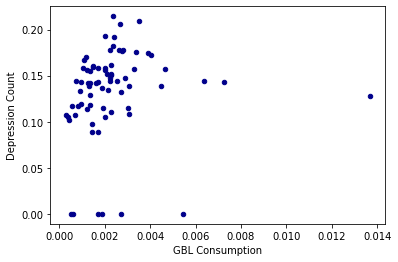

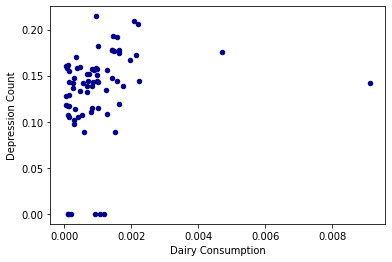

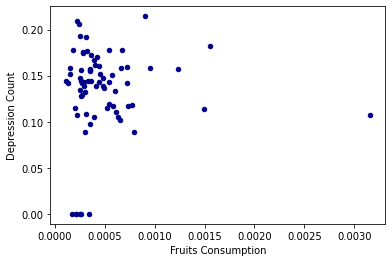

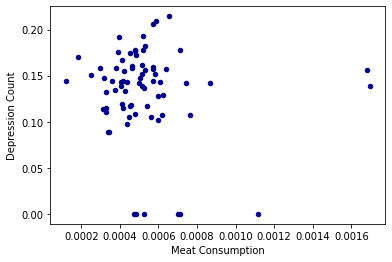

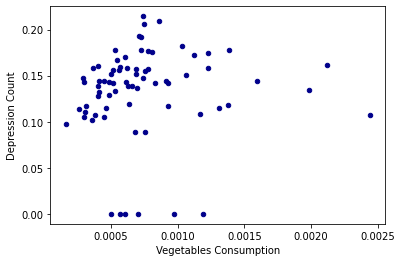

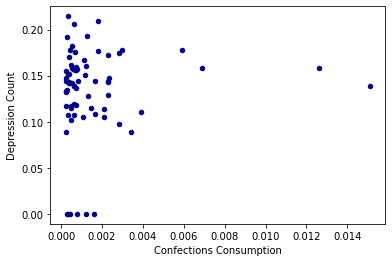

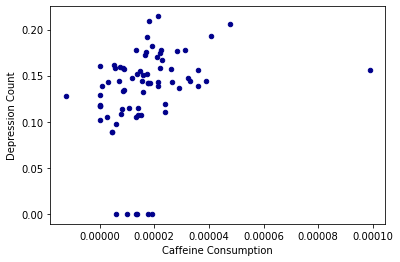

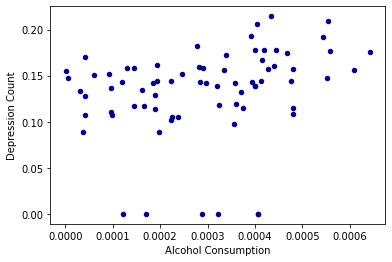

In [49]:
import matplotlib.pyplot as plt


for column in ['GBL Consumption',
       'Dairy Consumption', 'Fruits Consumption', 'Meat Consumption',
       'Vegetables Consumption', 'Confections Consumption',
       'Caffeine Consumption', 'Alcohol Consumption']:
    
    ax1 = FAO_above_gdp.plot.scatter(x=column,

                          y='Depression Count',

                          c='DarkBlue')

<AxesSubplot:>

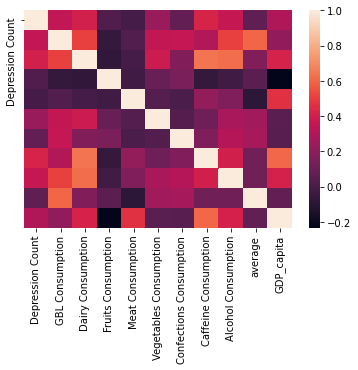

In [50]:
import seaborn as sns
%matplotlib inline


# calculate the correlation matrix
corr = FAO_above_gdp.groupby(['Country Name']).sum().reset_index().corr(method='spearman')

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=['Depression Count'])

In [51]:
corr.loc['Depression Count']

Depression Count           1.000000
GBL Consumption            0.351107
Dairy Consumption          0.411718
Fruits Consumption         0.024781
Meat Consumption          -0.012221
Vegetables Consumption     0.238695
Confections Consumption    0.083510
Caffeine Consumption       0.424239
Alcohol Consumption        0.364670
average                    0.069530
GDP_capita                 0.298396
Name: Depression Count, dtype: float64

### Below GDP capita

In [53]:
gdp_filtered_below

,Country Name,Country Code,GDP_capita
0,Afghanistan,AFG,555.356619
1,Albania,ALB,4296.627435
2,Algeria,DZA,4434.659564
5,Angola,AGO,4294.319002
8,Armenia,ARM,3774.964716
...,...,...,...
257,South Asia,SAS,1638.178406
258,South Asia (IDA & IBRD),TSA,1638.178406
259,Sub-Saharan Africa,SSF,1651.492786
260,Sub-Saharan Africa (excluding high income),SSA,1639.910145


In [54]:
FAO_below_gdp = pd.merge(FAO_consumption_depression_by_country_w_population, gdp_filtered_below, left_on=['Country Name'], right_on=['Country Name'])

In [55]:
FAO_below_gdp

,Country Name,Depression Count,GBL Consumption,Dairy Consumption,Fruits Consumption,Meat Consumption,Vegetables Consumption,Confections Consumption,Caffeine Consumption,Alcohol Consumption,average,Country Code,GDP_capita
0,Afghanistan,0.105834,0.000972,0.000248,0.000130,0.000062,0.000267,0.000077,0.000009,8.891188e-07,34865981.25,AFG,555.356619
1,Albania,0.096258,0.001631,0.001616,0.000842,0.000293,0.001415,0.000263,0.000010,1.486193e-04,2879841.25,ALB,4296.627435
2,Algeria,0.135712,0.001630,0.000396,0.000421,0.000146,0.001128,0.000252,0.000015,2.296498e-05,40148078.50,DZA,4434.659564
3,Angola,0.110855,0.001816,0.000040,0.000668,0.000206,0.001585,0.000229,0.000002,2.717530e-04,28371348.00,AGO,4294.319002
4,Armenia,0.126611,0.001283,0.000960,0.000777,0.000298,0.002047,0.000342,0.000014,1.638377e-05,2929727.75,ARM,3774.964716
...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,Vanuatu,0.102083,0.000426,0.000073,0.005107,0.000464,0.001023,0.000215,0.000000,0.000000e+00,274714.50,VUT,2965.601877
86,Vietnam,0.000000,0.002163,0.000033,0.000340,0.000468,0.000855,0.000924,0.000004,7.308112e-05,93156759.25,VNM,2168.299911
87,"Yemen, Rep.",0.136129,0.000792,0.000053,0.000118,0.000095,0.000109,0.000160,0.000002,1.155376e-06,26831101.25,YEM,1343.598931
88,Zambia,0.101289,0.001150,0.000100,0.000034,0.000135,0.000399,0.001156,0.000002,1.299919e-04,16124077.25,ZMB,1479.075839


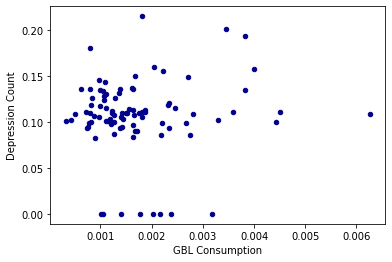

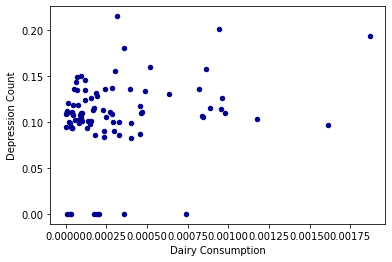

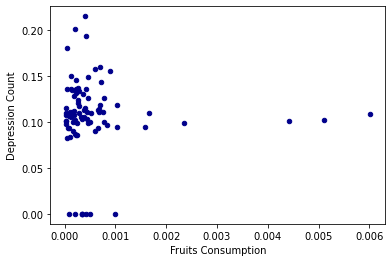

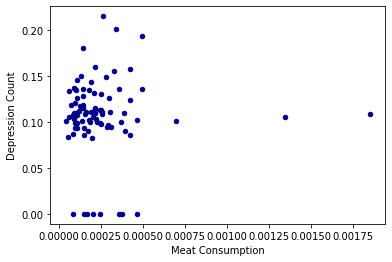

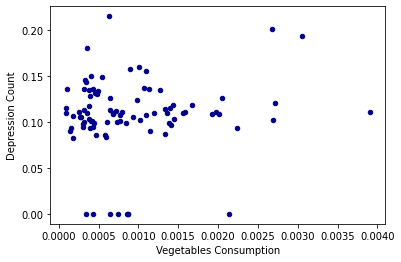

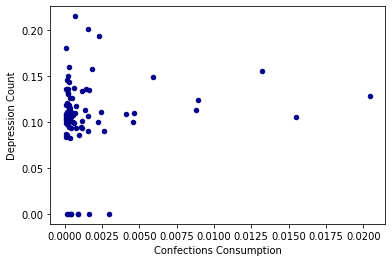

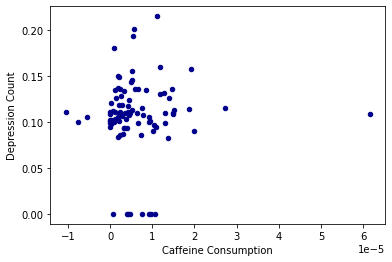

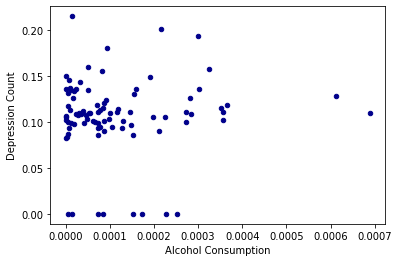

In [56]:
for column in ['GBL Consumption',
       'Dairy Consumption', 'Fruits Consumption', 'Meat Consumption',
       'Vegetables Consumption', 'Confections Consumption',
       'Caffeine Consumption', 'Alcohol Consumption']:
    
    ax1 = FAO_below_gdp.plot.scatter(x=column,

                          y='Depression Count',

                          c='DarkBlue')

<AxesSubplot:>

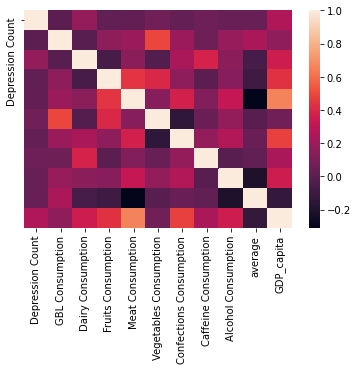

In [57]:
# calculate the correlation matrix
corr = FAO_below_gdp.groupby(['Country Name']).sum().reset_index().corr(method='spearman')

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=['Depression Count'])

In [58]:
corr.loc['Depression Count']

Depression Count           1.000000
GBL Consumption            0.003187
Dairy Consumption          0.176791
Fruits Consumption         0.019524
Meat Consumption           0.022900
Vegetables Consumption     0.071919
Confections Consumption    0.029858
Caffeine Consumption       0.060169
Alcohol Consumption        0.039245
average                    0.042020
GDP_capita                 0.259373
Name: Depression Count, dtype: float64